---
title: "AM"
format: 
  html: 
    toc: true
    css: styles.css
    echo: false
jupyter: python3
execute:
  echo: false # Hides all code globally
---

In [1]:
from util import Skim
from config import scenarioPath_OpenPath
from config import scenarioPath_EMME437

In [17]:
# Suppress all warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# generate comparison
comparison = Skim.comparison(scenarioPath_OpenPath, scenarioPath_EMME437, 'AM', 'transit')

# Scatterplot Comparison of AM Peak for WALK PRM modes assignment

Scatterplot comparison of AM Peak total actual in-vehicle travel time by walk premium

Intercept: 0.0091
Slope: 0.9908
R² Score: 0.9996
RMSE: 0.5400


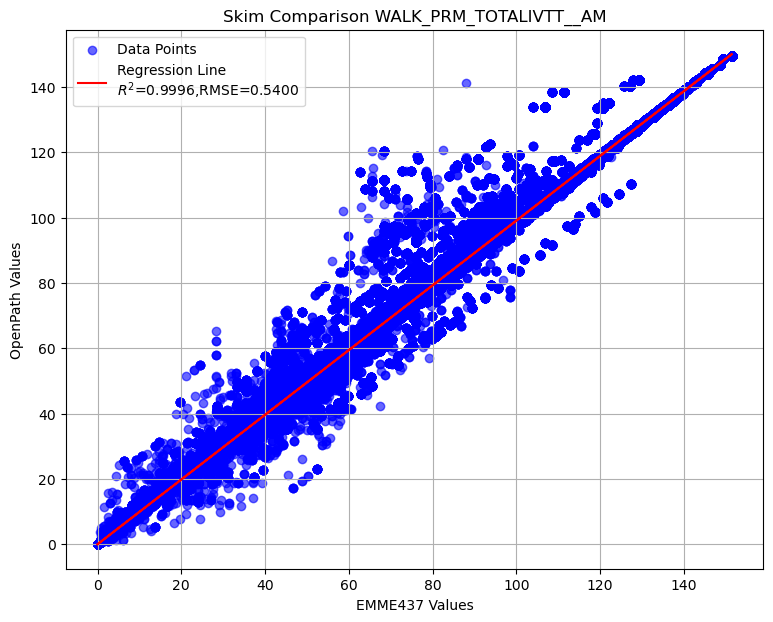

In [4]:
Skim.regression_scatter_plot('WALK_PRM_TOTALIVTT__AM', scenarioPath_OpenPath, scenarioPath_EMME437, 'AM', 'transit')

Scatterplot comparison of AM Peak actual in-vehicle travel time on LRT mode by walk premium

Intercept: 0.0025
Slope: 0.9997
R² Score: 0.9985
RMSE: 0.4815


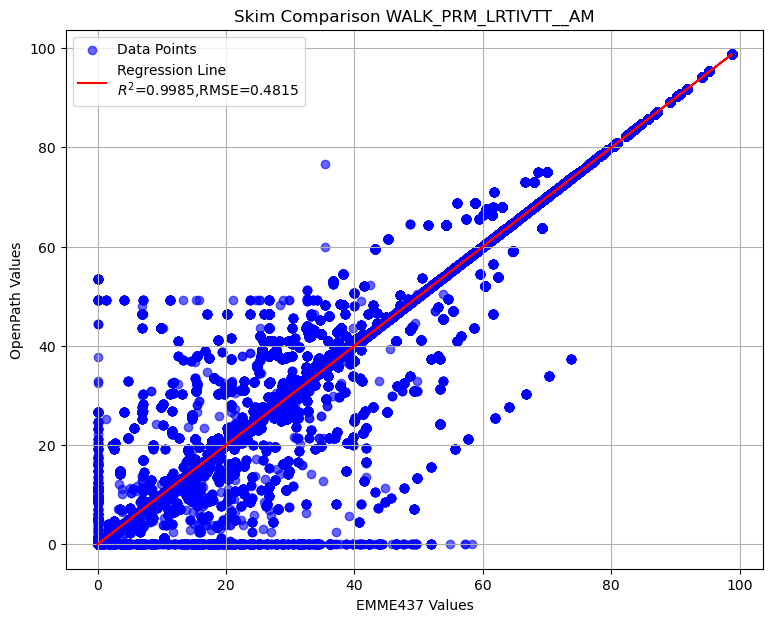

In [5]:
Skim.regression_scatter_plot('WALK_PRM_LRTIVTT__AM', scenarioPath_OpenPath, scenarioPath_EMME437, 'AM', 'transit')

Scatterplot comparison of AM Peak actual in-vehicle travel time on commuter rail mode by walk premium

Intercept: -0.0017
Slope: 0.9882
R² Score: 0.9889
RMSE: 0.8146


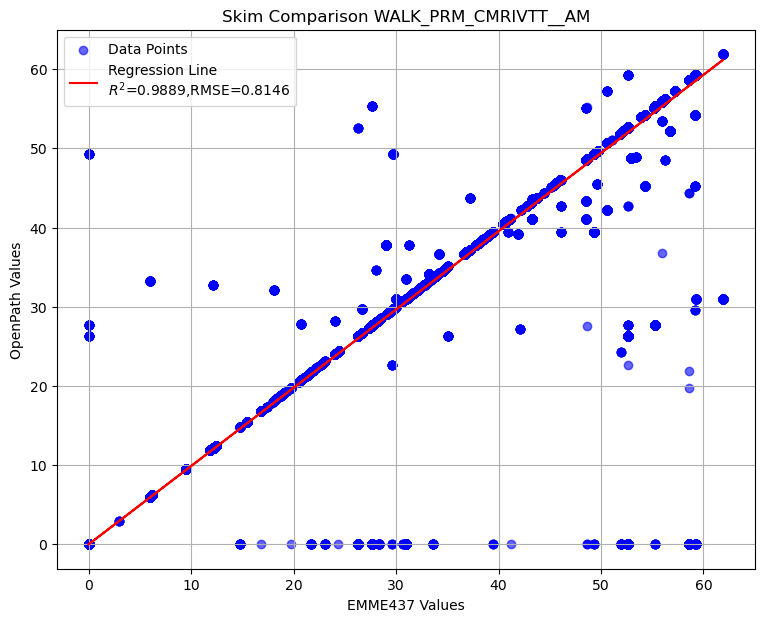

In [6]:
Skim.regression_scatter_plot('WALK_PRM_CMRIVTT__AM', scenarioPath_OpenPath, scenarioPath_EMME437, 'AM', 'transit')

Scatterplot comparison of AM Peak actual in-vehicle travel time on express bus mode by walk premium

Intercept: 0.0057
Slope: 0.9789
R² Score: 0.9960
RMSE: 0.4163


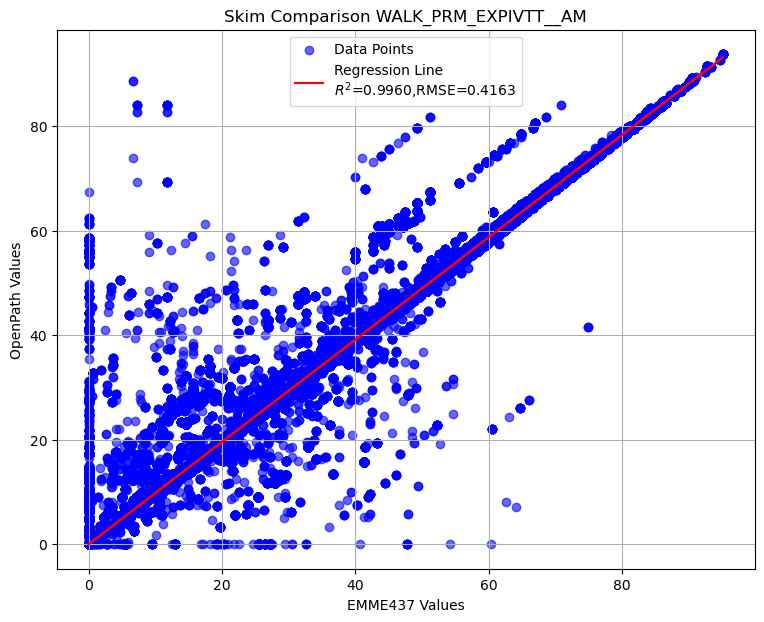

In [7]:
Skim.regression_scatter_plot('WALK_PRM_EXPIVTT__AM', scenarioPath_OpenPath, scenarioPath_EMME437, 'AM', 'transit')

Scatterplot comparison of AM Peak actual in-vehicle travel time on BRT mode by walk premium

Intercept: 0.0206
Slope: 0.9822
R² Score: 0.9953
RMSE: 1.0462


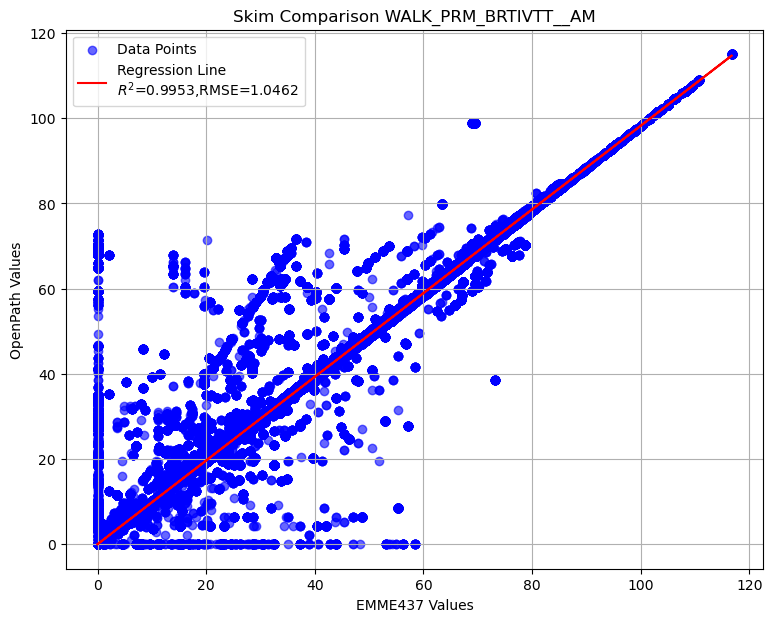

In [8]:
Skim.regression_scatter_plot('WALK_PRM_BRTIVTT__AM', scenarioPath_OpenPath, scenarioPath_EMME437, 'AM', 'transit')

Intercept: 0.0648
Slope: 0.9924
R² Score: 0.9999
RMSE: 0.7963


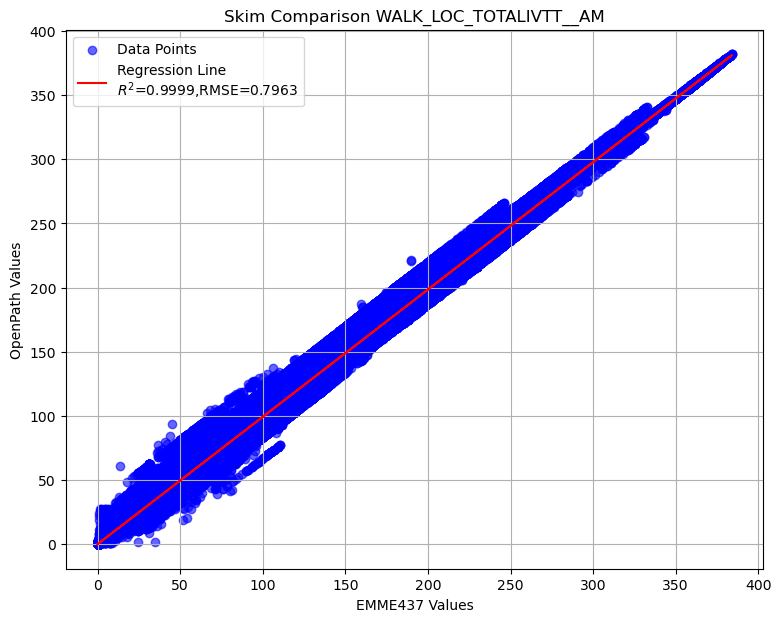

In [9]:
Skim.regression_scatter_plot('WALK_LOC_TOTALIVTT__AM', scenarioPath_OpenPath, scenarioPath_EMME437, 'AM', 'transit')

Intercept: 0.1343
Slope: 0.9922
R² Score: 0.9965
RMSE: 2.8342


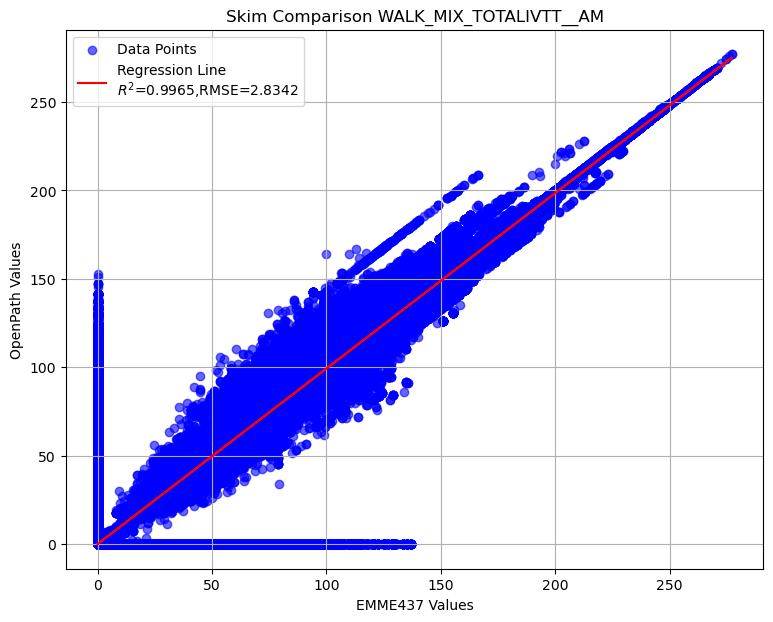

In [10]:
Skim.regression_scatter_plot('WALK_MIX_TOTALIVTT__AM', scenarioPath_OpenPath, scenarioPath_EMME437, 'AM', 'transit')

# Summary of transit AM skim comparison (EMME OpenPath - EMME 4.3.7)

To display the top 5 rows of skim comparison (sort by WALK_PRM_TOTALIVTT__AM)

In [38]:
comparison.sort_values(by='WALK_PRM_TOTALIVTT__AM', ascending=False).head().round(2).applymap(lambda x: f"{x:.2f}".rstrip('0').rstrip('.')).style.set_table_styles(
    [{'selector': 'thead th', 'props': [('background-color', 'lightblue')]}]  # Custom header style
).hide(axis = "index")

Origin,Destination,WALK_PRM_TOTALIVTT__AM,WALK_PRM_LRTIVTT__AM,WALK_PRM_CMRIVTT__AM,WALK_PRM_EXPIVTT__AM,WALK_PRM_BRTIVTT__AM,WALK_LOC_TOTALIVTT__AM,WALK_MIX_TOTALIVTT__AM,WALK_PRM_XFERS__AM,WALK_LOC_XFERS__AM,WALK_MIX_XFERS__AM
1933,112,54.86,36.61,-58.57,8.96,67.86,-2.05,-0.02,1,0,0
3746,129,53.27,41.14,-52.62,0,64.75,-2.45,-0.01,0,0,0
1933,114,52,33.76,-58.57,8.96,67.86,-2.05,-0.01,1,0,0
1933,138,52,33.76,-58.57,8.96,67.86,-2.04,0,1,0,0
1933,131,52,33.76,-58.57,8.96,67.86,-2.06,0,1,0,0


Below is the summary of selected matrices difference in transit AM skim

In [39]:
comparison_excluded = comparison.drop(columns=['Origin', 'Destination'])
desc = comparison_excluded.describe().applymap(lambda x: f"{x:,.2f}").style.set_table_styles(
    [{'selector': 'thead th', 'props': [('background-color', 'lightblue')]}]  # Custom header style
)
desc

,WALK_PRM_TOTALIVTT__AM,WALK_PRM_LRTIVTT__AM,WALK_PRM_CMRIVTT__AM,WALK_PRM_EXPIVTT__AM,WALK_PRM_BRTIVTT__AM,WALK_LOC_TOTALIVTT__AM,WALK_MIX_TOTALIVTT__AM,WALK_PRM_XFERS__AM,WALK_LOC_XFERS__AM,WALK_MIX_XFERS__AM
count,"24,472,809.00","24,472,809.00","24,472,809.00","24,472,809.00","24,472,809.00","24,472,809.00","24,472,809.00","24,472,809.00","24,472,809.00","24,472,809.00"
mean,-0.11,0.00,-0.02,-0.02,-0.07,-0.52,-0.18,-0.00,0.00,0.00
std,0.60,0.48,0.82,0.44,1.08,1.02,2.86,0.02,0.04,0.07
min,-29.40,-58.35,-59.24,-60.31,-58.45,-39.59,-137.10,-2.00,-2.07,-3.50
25%,0.00,0.00,0.00,0.00,0.00,-0.83,-0.23,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,-0.05,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,54.86,53.38,49.33,81.99,72.82,48.46,152.50,2.67,2.88,3.50


Let's check the records with difference in WALK_PRM_LRTIVTT__AM greater than 50

In [40]:
comparison.loc[comparison['WALK_PRM_LRTIVTT__AM']>50].round(2).applymap(lambda x: f"{x:.2f}".rstrip('0').rstrip('.')).style.set_table_styles(
    [{'selector': 'thead th', 'props': [('background-color', 'lightblue')]}]  # Custom header style
).hide(axis = "index")

Origin,Destination,WALK_PRM_TOTALIVTT__AM,WALK_PRM_LRTIVTT__AM,WALK_PRM_CMRIVTT__AM,WALK_PRM_EXPIVTT__AM,WALK_PRM_BRTIVTT__AM,WALK_LOC_TOTALIVTT__AM,WALK_MIX_TOTALIVTT__AM,WALK_PRM_XFERS__AM,WALK_LOC_XFERS__AM,WALK_MIX_XFERS__AM
40,2364,10,53.38,-59.24,0,15.85,-0.95,0,0,0,0
40,2398,10,53.38,-59.24,0,15.85,-0.98,0,0,0,0
40,2420,10,53.38,-59.24,0,15.85,-0.98,0,0,0,0
40,2436,10,53.38,-59.24,0,15.85,-0.99,0,0,0,0
40,2526,10,53.38,-59.24,0,15.85,-0.98,0,0,0,0
43,2364,10,53.38,-59.24,0,15.85,-0.95,0,0,0,0
43,2398,10,53.38,-59.24,0,15.85,-0.98,0,0,0,0
43,2420,10,53.38,-59.24,0,15.85,-0.98,0,0,0,0
43,2436,10,53.38,-59.24,0,15.85,-0.99,0,0,0,0
43,2526,10,53.38,-59.24,0,15.85,-0.98,0,0,0,0


Let's check the records with difference in WALK_PRM_LRTIVTT__AM less than -50

In [41]:
comparison.loc[comparison['WALK_PRM_LRTIVTT__AM']<-50].round(2).applymap(lambda x: f"{x:.2f}".rstrip('0').rstrip('.')).style.set_table_styles(
    [{'selector': 'thead th', 'props': [('background-color', 'lightblue')]}]  # Custom header style
).hide(axis = "index")

Origin,Destination,WALK_PRM_TOTALIVTT__AM,WALK_PRM_LRTIVTT__AM,WALK_PRM_CMRIVTT__AM,WALK_PRM_EXPIVTT__AM,WALK_PRM_BRTIVTT__AM,WALK_LOC_TOTALIVTT__AM,WALK_MIX_TOTALIVTT__AM,WALK_PRM_XFERS__AM,WALK_LOC_XFERS__AM,WALK_MIX_XFERS__AM
2627,1190,2.97,-51.9,0,54.87,0,-2.38,-0.12,-1.5,0,0
2627,1199,2.97,-51.9,0,54.87,0,-2.38,-0.12,-1.5,0,0
2641,1190,2.97,-51.9,0,54.87,0,-2.34,0,-1.5,0,0
2641,1199,2.97,-51.9,0,54.87,0,-2.34,0,-1.5,0,0
2650,1190,2.97,-51.9,0,54.87,0,-2.34,0,-1.5,0,0
2650,1199,2.97,-51.9,0,54.87,0,-2.34,0,-1.5,0,0
2713,1190,2.97,-51.9,0,54.87,0,-2.34,0,-1.5,0,0
2713,1199,2.97,-51.9,0,54.87,0,-2.34,0,-1.5,0,0
2726,1190,2.97,-51.9,0,54.87,0,-2.34,-0.12,-1.5,0,0
2726,1199,2.97,-51.9,0,54.87,0,-2.34,-0.12,-1.5,0,0
